In [2]:
import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns

sc.settings.verbosity = 3

In [3]:
SCRNA_DIR = '../data/seurat-2020/'
SCCITE_DIR = '../data/seurat-2020/'

# Preproces scRNA-seq

In [5]:
scrna = sc.read(SCRNA_DIR + 'pbmc_multimodal_rna.h5ad')

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/compat/__init__.py:161: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  FutureWarning,


## Vizualize using provided UMAP

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'orig.ident' as categorical
... storing 'lane' as categorical
... storing 'donor' as categorical
... storing 'time' as categorical
... storing 'celltype.l1' as categorical
... storing 'celltype.l2' as categorical
... storing 'celltype.l3' as categorical
... storing 'Phase' as categorical


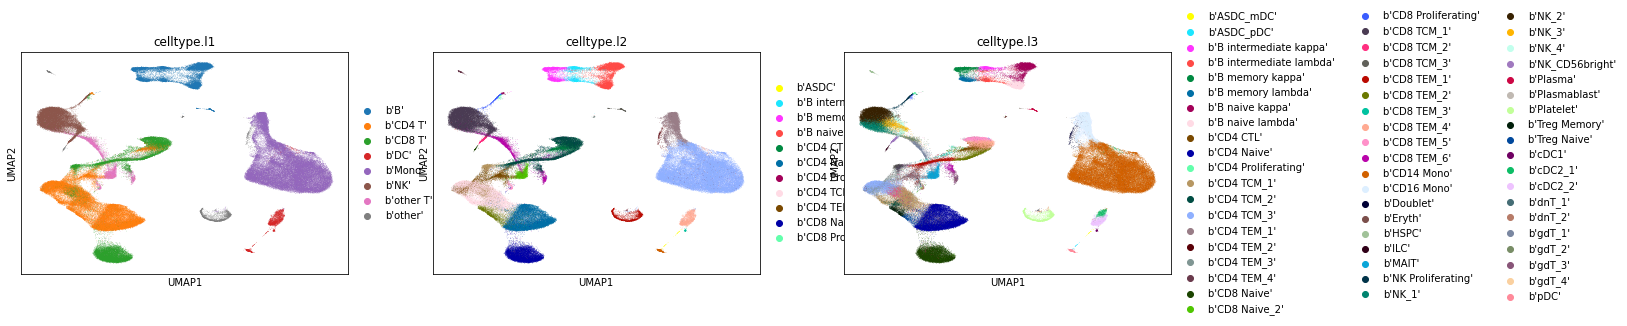

In [6]:
sc.pl.umap(scrna, color = ['celltype.l1', 'celltype.l2', 'celltype.l3'])

## Data Cleaning

In [7]:
scrna.var_names_make_unique()

In [8]:
scrna.var_names = scrna.var_names.astype('str')
scrna.obs_names = scrna.obs_names.astype('str')

## Highly variable genes

extracting highly variable genes
    finished (0:00:56)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


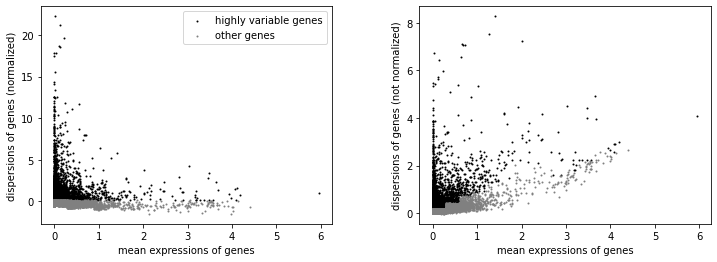

number of highly variable genes = 4000


In [9]:
sc.pp.highly_variable_genes(scrna, n_top_genes=4000)
sc.pl.highly_variable_genes(scrna)
print('number of highly variable genes =', scrna.var.highly_variable.sum())

In [10]:
scrna = scrna[:, scrna.var.highly_variable]
scrna

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


View of AnnData object with n_obs × n_vars = 161764 × 4000
    obs: 'nCount_ADT', 'nFeature_ADT', 'nCount_RNA', 'nFeature_RNA', 'orig.ident', 'lane', 'donor', 'time', 'celltype.l1', 'celltype.l2', 'celltype.l3', 'Phase'
    var: 'features', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'neighbors', 'celltype.l1_colors', 'celltype.l2_colors', 'celltype.l3_colors'
    obsm: 'X_apca', 'X_aumap', 'X_pca', 'X_spca', 'X_umap', 'X_wnn.umap'
    varm: 'PCs', 'SPCA'
    obsp: 'distances'

# Preproces CITE-seq

In [11]:
cite = sc.read(SCCITE_DIR + 'pbmc_multimodal_protein.h5ad')

In [12]:
cite

AnnData object with n_obs × n_vars = 161764 × 224
    obs: 'nCount_ADT', 'nFeature_ADT', 'nCount_RNA', 'nFeature_RNA', 'orig.ident', 'lane', 'donor', 'time', 'celltype.l1', 'celltype.l2', 'celltype.l3', 'Phase'
    var: 'features'
    obsm: 'X_apca', 'X_aumap', 'X_pca', 'X_spca', 'X_umap', 'X_wnn.umap'
    varm: 'APCA'

In [17]:
cite.var_names_make_unique()

In [21]:
cite.obs_names = cite.obs_names.astype('str')
cite.var_names = cite.var_names.astype('str')

## Vizualize using provided UMAP

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'orig.ident' as categorical
... storing 'lane' as categorical
... storing 'donor' as categorical
... storing 'time' as categorical
... storing 'celltype.l1' as categorical
... storing 'celltype.l2' as categorical
... storing 'celltype.l3' as categorical
... storing 'Phase' as categorical


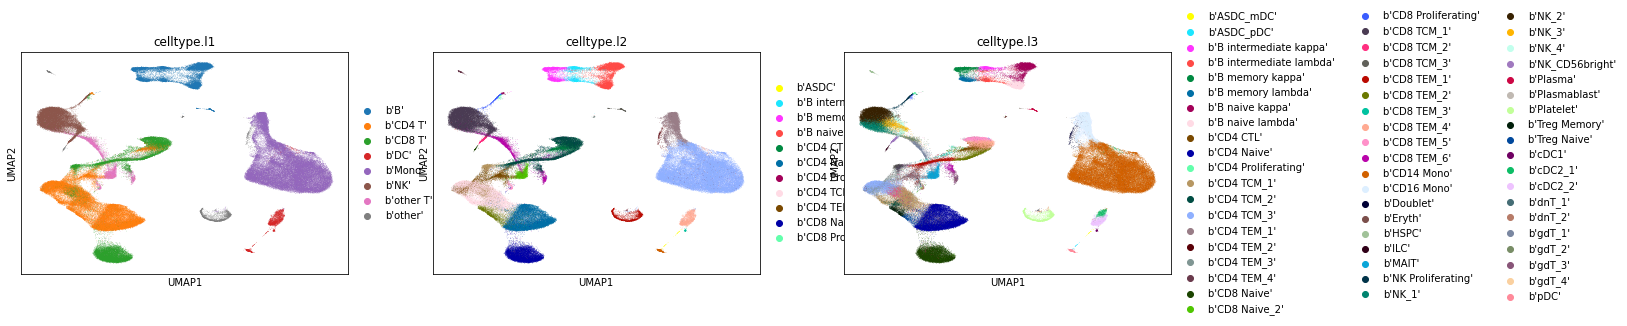

In [18]:
sc.pl.umap(cite, color = ['celltype.l1', 'celltype.l2', 'celltype.l3'])

# Save the results

## Find common cells

In [22]:
com_index = set(scrna.obs.index) & set(cite.obs.index)

In [24]:
com_index = set(scrna.obs.index) & set(cite.obs.index)
scrna = scrna[scrna.obs.index.isin(com_index)]
cite = cite[cite.obs.index.isin(com_index)]
print(scrna.shape, cite.shape)

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


(161764, 4000) (161764, 224)


In [26]:
# to fix a seurat to adata bug which didn't allow to save the files
scrna.__dict__['_raw'].__dict__['_var'] = scrna.__dict__['_raw'].__dict__['_var'].rename(columns={'_index': 'features'})
cite.__dict__['_raw'].__dict__['_var'] = cite.__dict__['_raw'].__dict__['_var'].rename(columns={'_index': 'features'})

In [27]:
scrna.write(SCRNA_DIR + 'expressions.h5ad')

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


In [28]:
cite.write(SCCITE_DIR + 'protein.h5ad')

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
